# using  dataset downloaded from kaggle 
       
       working on the file with pandas 

In [59]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [44]:
boston=pd.read_csv("/home/hardik/Downloads/train.csv")
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [53]:
#training dataset
y=boston["medv"]
x=boston.drop(["medv","chas"],axis=1)
x.shape

(333, 13)

In [56]:
#testing data
boston2=pd.read_csv("/home/hardik/Downloads/test.csv")
boston2=boston2.drop("chas",axis=1)
boston2.head()

,ID,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [57]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x,y)
predict=knn.predict(boston2)
print("predicted value:",predict)

predicted value: [26.36 26.36 16.64 15.44 18.92 17.1  20.2  15.48 14.96 15.72 15.48 16.22
 14.96 15.72 20.66 20.38 23.2  22.54 22.22 21.42 23.58 21.3  21.96 24.34
 23.24 22.56 24.84 23.7  24.08 24.44 24.04 25.44 23.7  19.68 19.68 22.62
 19.58 18.94 17.9  19.78 17.86 17.86 17.74 17.24 16.8  24.44 24.44 19.02
 20.56 20.72 18.86 33.82 38.84 20.62 36.72 40.22 34.16 37.8  27.32 27.32
 34.34 30.84 23.78 27.24 24.6  24.56 24.56 24.92 27.24 27.24 33.38 26.86
 39.18 36.84 25.68 23.34 27.   22.7  31.44 28.5  24.56 25.28 34.2  38.64
 38.02 38.64 34.78 35.22 35.22 31.66 31.66 32.94 31.82 33.88 26.18 27.2
 34.2  23.44 23.68 27.16 27.16 26.66 33.66 19.3  19.3  21.   23.24 23.24
 19.44 23.54 21.08 28.16 26.98 20.4  19.7  25.38 24.18 25.36 22.   34.18
 25.86 25.86 33.28 33.28 40.5  39.16 19.48 11.26 11.78  7.36 11.78 10.24
 13.92 11.74 10.72 10.72 10.72 26.44 13.06 23.56  7.36 11.4  14.46  8.78
  9.04  8.88  8.86 17.64 17.64 17.04  9.88 10.56 13.44 13.44  9.38 11.58
 18.64 19.1  12.24 12.26 12.26 20.5

# using dataset available at sklearn 
       
       also using hyperparameter optimization

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [81]:
boston3=datasets.load_boston()
xagain=boston3.data[:,:]
yagain=boston3.target

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(xagain,yagain,test_size=0.2,random_state=42)

In [85]:
mean_sqaure=[]
for i in range(1,20):
    knn2=KNeighborsRegressor(n_neighbors=i)
    knn2.fit(xtrain,ytrain)
    predict_val=knn2.predict(xtest)
    mean_sqaure.append(mean_squared_error(predict_val,ytest))
print("mean error     :",mean_sqaure)

mean error     : [42.686078431372536, 32.59946078431373, 21.65955337690632, 24.07094362745098, 25.860125490196076, 28.143142701525058, 29.569411764705876, 33.369483762254895, 35.00228637133866, 36.38781274509804, 36.18335439961109, 36.39686478758171, 35.223742313493446, 35.32136254501801, 36.66771808278868, 36.79602596507353, 38.047223013772985, 38.26115196078432, 38.25317364618977]


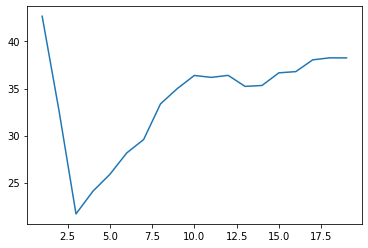

In [90]:
plt.plot(range(1,20),mean_sqaure)

In [92]:
# form the graph and values of mean square it is clear that mean error is least for k =3
#hence take k=3
knn3=KNeighborsRegressor(n_neighbors=3)
knn3.fit(xtrain,ytrain)
predict_val=knn3.predict(xtest)
mean_sqaure2=(mean_squared_error(predict_val,ytest))
print("predicted value:",predict_val)
print("known values   :",ytest)
print("mean error     :",mean_sqaure2)

predicted value: [25.1        32.76666667 14.6        31.         17.13333333 29.3
 17.76666667 15.96666667 19.86666667 21.43333333 23.66666667 19.86666667
 11.4        22.66666667 23.8        20.96666667 19.73333333 12.63333333
 36.4        11.1        27.83333333 32.76666667 14.9        20.3
 17.83333333 17.3        23.13333333 11.7        23.66666667 22.06666667
 23.36666667 23.53333333  9.4        39.26666667 19.83333333 19.33333333
 22.73333333 24.33333333 21.9        30.5        22.06666667 28.73333333
 43.76666667 21.26666667 24.03333333 12.56666667 14.9        31.
 20.73333333 22.06666667 24.06666667 30.76666667 18.96666667 22.06666667
 31.9        20.83333333 10.83333333 33.36666667 23.33333333 20.33333333
 23.5        36.4        30.5        14.93333333 28.46666667 22.06666667
 12.16666667 24.73333333 33.36666667 13.43333333 20.53333333 23.6
 13.33333333 20.36666667 22.66666667  9.73333333 19.7        43.76666667
 10.23333333 12.83333333 21.26666667 13.73333333 26.63333333 12